In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!wget https://archive.ics.uci.edu/static/public/280/higgs.zip
!unzip /content/higgs.zip

--2024-03-14 20:52:23--  https://archive.ics.uci.edu/static/public/280/higgs.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘higgs.zip’

higgs.zip               [<=>                 ]   2.62G  2.42MB/s    in 9m 11s  

2024-03-14 21:01:36 (4.87 MB/s) - ‘higgs.zip’ saved [2816865137]

Archive:  /content/higgs.zip
  inflating: HIGGS.csv.gz            


In [3]:
import pandas as pd
higgs_data = pd.read_csv('HIGGS.csv.gz', compression='gzip', header=None, nrows=10000)
higgs_data.columns = ['class_label',
                      'lepton_pT', 'lepton_eta', 'lepton_phi',
                      'missing_energy_magnitude', 'missing_energy_phi',
                      'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag',
                      'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b-tag',
                      'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b-tag',
                      'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag',
                      'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

In [ ]:
higgs_data.head(5)

,class_label,lepton_pT,lepton_eta,lepton_phi,missing_energy_magnitude,missing_energy_phi,jet_1_pt,jet_1_eta,jet_1_phi,jet_1_b-tag,...,jet_4_eta,jet_4_phi,jet_4_b-tag,m_jj,m_jjj,m_lv,m_jlv,m_bb,m_wbb,m_wwbb
0,1.0,0.869293,-0.635082,0.225690,0.327470,-0.689993,0.754202,-0.248573,-1.092064,0.000000,...,-0.010455,-0.045767,3.101961,1.353760,0.979563,0.978076,0.920005,0.721657,0.988751,0.876678
1,1.0,0.907542,0.329147,0.359412,1.497970,-0.313010,1.095531,-0.557525,-1.588230,2.173076,...,-1.138930,-0.000819,0.000000,0.302220,0.833048,0.985700,0.978098,0.779732,0.992356,0.798343
2,1.0,0.798835,1.470639,-1.635975,0.453773,0.425629,1.104875,1.282322,1.381664,0.000000,...,1.128848,0.900461,0.000000,0.909753,1.108330,0.985692,0.951331,0.803252,0.865924,0.780118
3,0.0,1.344385,-0.876626,0.935913,1.992050,0.882454,1.786066,-1.646778,-0.942383,0.000000,...,-0.678379,-1.360356,0.000000,0.946652,1.028704,0.998656,0.728281,0.869200,1.026736,0.957904
4,1.0,1.105009,0.321356,1.522401,0.882808,-1.205349,0.681466,-1.070464,-0.921871,0.000000,...,-0.373566,0.113041,0.000000,0.755856,1.361057,0.986610,0.838085,1.133295,0.872245,0.808487


In [4]:
for col in higgs_data:
  if col == "class_label":
    continue
  if higgs_data[col].min() >= 0:
    higgs_data[col] = (higgs_data[col] - higgs_data[col].mean() + 1) / higgs_data[col].std()
  else:
    higgs_data[col] = (higgs_data[col] - higgs_data[col].mean()) / higgs_data[col].std()
  print(col, higgs_data[col].min(), higgs_data[col].max(), higgs_data[col].mean(), higgs_data[col].std())

lepton_pT 0.48201003213346133 11.64846815684632 1.7392355985959789 1.0
lepton_eta -2.4014882638286967 2.4394991834999673 1.0658141036401503e-17 1.0
lepton_phi -1.7203778968169168 1.7279945535907155 1.7408297026122454e-17 1.0
missing_energy_magnitude 0.03521705425916338 9.795145661640225 1.6793725720337869 0.9999999999999999
missing_energy_phi -1.7256020995728303 1.7442200846969589 -1.7053025658242403e-17 1.0
jet_1_pt 0.3507065654685007 14.814573446694025 2.094643413695039 0.9999999999999999
jet_1_eta -2.927493645893667 2.958965509029011 4.973799150320701e-18 1.0
jet_1_phi -1.7176657460886724 1.7104942961455871 1.5631940186722205e-17 1.0000000000000002
jet_1_b-tag -0.004809382275231497 2.1112085259206554 0.9737430993699565 0.9999999999999998
jet_2_pt 0.4128669482676001 10.623466227554681 2.04108965232568 1.0
jet_2_eta -2.862110901576408 2.9028426309272177 1.1368683772161604e-17 1.0
jet_2_phi -1.7329465425187327 1.7340791622473235 1.3145040611561854e-17 1.0
jet_2_b-tag 0.0180958756777562

In [5]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=20, c=color, cmap="Paired", alpha=0.8)
    plt.show()

2.2.1+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 62.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


## KNN Clustering

Target: take higgs data and cluster simply based on L2 norm between full feature sets (actually, need to drop last seven, don't forget that!).

In [38]:
from sklearn.neighbors import BallTree
k=500
# ball_tree = BallTree(higgs_data.drop(["class_label", 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1), metric="l2")
# out = ball_tree.query(higgs_data.drop(["class_label", 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1), k=200, return_distance=False)
ball_tree = BallTree(higgs_data.drop(["class_label"], axis=1), metric="l2")
out = ball_tree.query(higgs_data.drop(["class_label"], axis=1), k=k, return_distance=False)

out.shape

(10000, 500)

In [39]:
import torch
edge_index = []
for i, nbrs in enumerate(out):
  for nbr in nbrs:
    edge_index.append([i, nbr])
edge_index = torch.tensor(edge_index).t().contiguous()
print(edge_index.shape)

torch.Size([2, 5000000])


In [ ]:
# adj_matrix = np.zeros((out.shape[0], out.shape[0]))
# for i in range(out.shape[0]):
#   for nbr in out[i]:
#     adj_matrix[nbr] = 1

In [40]:
# represents data as an object assigned inputs as a grid and labels
from torch_geometric.data import Data
data = Data(
  x=torch.from_numpy(higgs_data.drop(["class_label"], axis=1).to_numpy()).type(torch.float32),
  # x=torch.from_numpy(higgs_data.drop(["class_label", 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1).to_numpy()).type(torch.float32),
  y = torch.from_numpy(higgs_data["class_label"].to_numpy()).type(torch.int64),
  edge_index=edge_index
)
data.validate(raise_on_error=True)

True

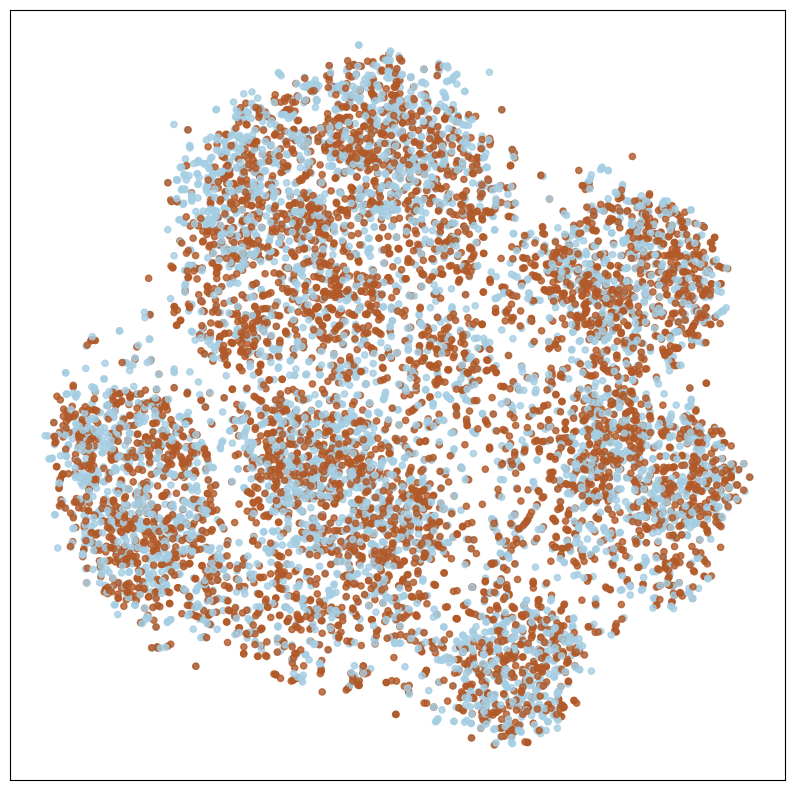

In [16]:
visualize(data.x, color=torch.from_numpy(higgs_data["class_label"].to_numpy()))

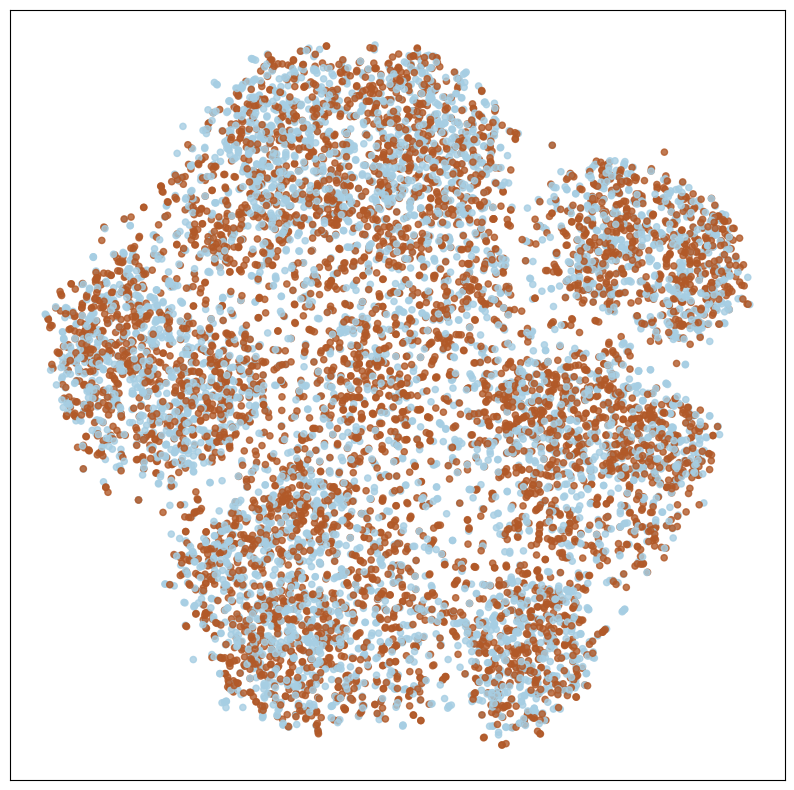

In [27]:
visualize(torch.from_numpy(higgs_data.drop(["class_label", 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1).to_numpy()), color=torch.from_numpy(higgs_data["class_label"].to_numpy()))

In [28]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear, PReLU
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(0)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 2)
        self.prelu = PReLU()

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.prelu(x)
        x = F.dropout(x, p=0.5)
        x = self.conv2(x, edge_index)
        return x

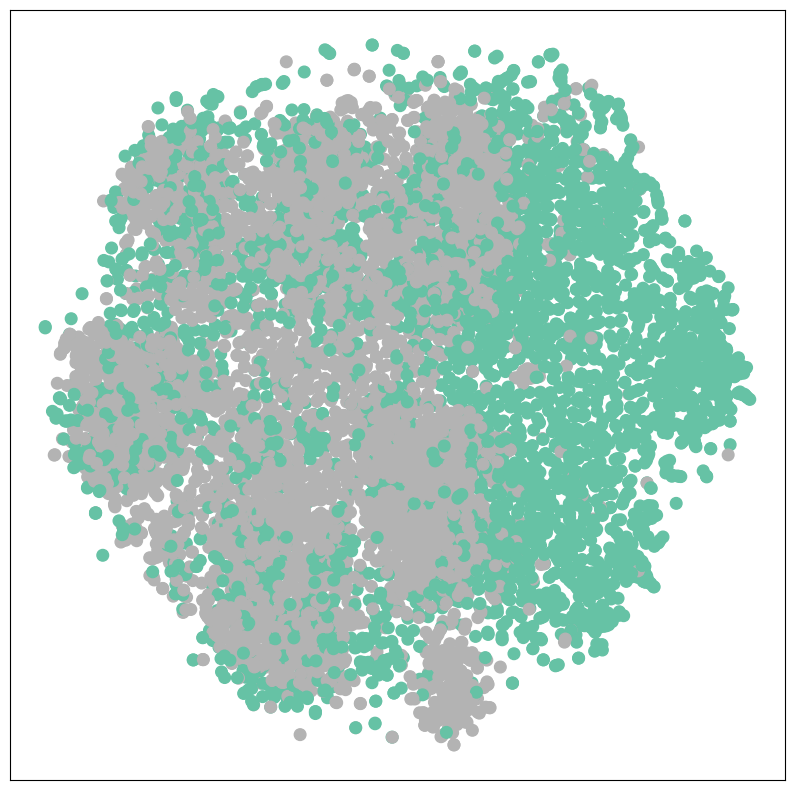

In [ ]:
# model = GCN(hidden_channels=32)
model.eval()

out = model(data.x, data.edge_index)
visualize(data.x, color=torch.argmax(out, dim=-1))

In [29]:
import random
train_mask = set(random.sample(range(data.num_nodes), int(data.num_nodes * 0.7)))
test_mask = set(range(data.num_nodes)) - train_mask
print(len(train_mask), len(test_mask))
test_mask = list(test_mask)
train_mask = list(train_mask)

7000 3000


In [ ]:
table_dict = {
    "names": higgs_data.columns,
    "desc": [""]
}

In [49]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

hidden_dims = 128
model = GCN(hidden_channels=hidden_dims)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
def train():
  seen, correct = 0, 0
  model.train()
  loss_tracked = []
  acc_tracked = []
  optimizer.zero_grad()  # Clear gradients.
  out = model(data.x, data.edge_index)  # Perform a single forward pass.
  loss = criterion(out[train_mask], data.y[train_mask])  # Compute the loss solely based on the training nodes.
  loss.backward()  # Derive gradients.
  loss_tracked.append(loss)
  for dp in out:
    seen += 1
    if dp.argmax() == 1:
      correct += 1
  acc_tracked.append(correct/seen)
  optimizer.step()  # Update parameters based on gradients.
  return loss, loss_tracked, acc_tracked

all_losses = []
all_accs = []
num_epochs = 20
for epoch in range(1, num_epochs):
    loss, losses, accs = train()
    all_losses.append(losses)
    all_accs.append(accs)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

Epoch: 001, Loss: 0.7915
Epoch: 002, Loss: 0.7388
Epoch: 003, Loss: 0.7195
Epoch: 004, Loss: 0.7330
Epoch: 005, Loss: 0.7323
Epoch: 006, Loss: 0.7287
Epoch: 007, Loss: 0.7165
Epoch: 008, Loss: 0.7057
Epoch: 009, Loss: 0.7004
Epoch: 010, Loss: 0.7021
Epoch: 011, Loss: 0.7061
Epoch: 012, Loss: 0.7087
Epoch: 013, Loss: 0.7034
Epoch: 014, Loss: 0.6979
Epoch: 015, Loss: 0.6958
Epoch: 016, Loss: 0.6915
Epoch: 017, Loss: 0.6869
Epoch: 018, Loss: 0.6901
Epoch: 019, Loss: 0.6924


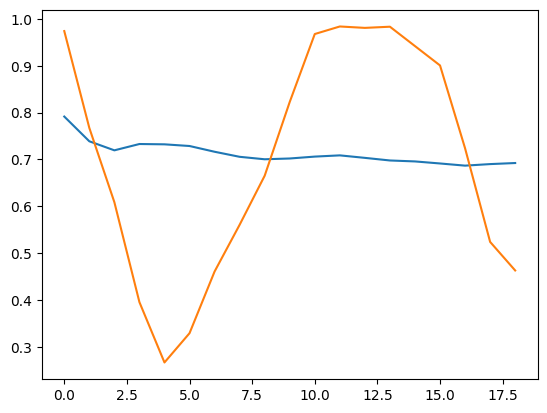

In [50]:
plt.plot([al[0].detach().numpy() for al in all_losses])
plt.plot([al[0] for al in all_accs])
np.save(f"k{k}_hidden{hidden_dims}_epoch{num_epochs}.npy", np.array([al[0].detach().numpy() for al in all_losses]))

In [51]:
def test():
      model.eval()
      out = model(data.x, data.edge_index)
      print(out)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      print(pred)
      test_correct = pred[test_mask] == data.y[test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / len(test_mask)  # Derive ratio of correct predictions.
      return test_acc

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

tensor([[-1.2791, -1.1387],
        [-0.5911, -0.4684],
        [-0.6764, -0.7799],
        ...,
        [-0.4413, -0.4819],
        [-0.3193, -0.3589],
        [-0.8417, -0.7875]], grad_fn=<AddBackward0>)
tensor([1, 1, 0,  ..., 0, 0, 1])
Test Accuracy: 0.5047


In [ ]:
sum(data.y[test_mask]) / len(test_mask)

tensor(0.5347)

<Figure size 640x480 with 0 Axes>

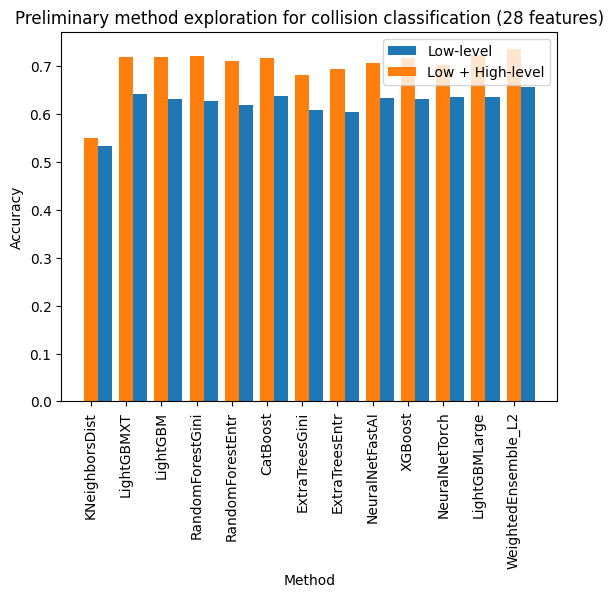

In [98]:
## Plot AutoML results
auto_results = {
  "KNeighborsDist": 0.5331,
  "LightGBMXT": 0.6419,
  "LightGBM": 0.6306,
  "RandomForestGini": 0.6269,
  "RandomForestEntr": 0.6181,
  "CatBoost": 0.6369,
  "ExtraTreesGini": 0.6081,
  "ExtraTreesEntr": 0.6044,
  "NeuralNetFastAI": 0.6331,
  "XGBoost": 0.6319,
  "NeuralNetTorch": 0.6356,
  "LightGBMLarge": 0.6362,
  "WeightedEnsemble_L2": 0.6569
}

auto_results_w7 = {
  "KNeighborsDist": 0.5494,
  "LightGBMXT": 0.7188,
  "LightGBM": 0.7194,
  "RandomForestGini": 0.7212,
  "RandomForestEntr": 0.7106,
  "CatBoost": 0.7181,
  "ExtraTreesGini": 0.6819,
  "ExtraTreesEntr": 0.695,
  "NeuralNetFastAI": 0.7075,
  "XGBoost": 0.7163,
  "NeuralNetTorch": 0.7019,
  "LightGBMLarge": 0.7238,
  "WeightedEnsemble_L2": 0.735
}

plt.tight_layout()
fig, ax = plt.subplots()

plt.bar(np.add(list(range(13)), 0.4), [auto_results[key] for key in auto_results], width=0.4, label="Low-level")
plt.bar(list(range(13)), [auto_results_w7[key] for key in auto_results_w7], width=0.4, label="Low + High-level")
plt.title("Preliminary method exploration for collision classification (28 features)")
ax.set_xticks(range(13), auto_results.keys())
plt.xlabel("Method")
plt.ylabel("Accuracy")
plt.xticks(rotation=90)
plt.legend()

In [88]:
np.add(list(range(13)), 13)

array([13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])

In [20]:
model.eval()

out = model(data.x, data.edge_index)
visualize(out, color=torch.argmax(out, dim=-1))

KeyboardInterrupt: 

## Cosine Similarity instead

In [5]:
from sklearn.metrics.pairwise import cosine_similarity
edge_list = []
cos_sim_mat = cosine_similarity(higgs_data.drop(["class_label", 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1))
print(cos_sim_mat.shape)

(10000, 10000)


In [53]:
print(f"Mean: {np.mean(cos_sim_mat)}, stdev: {np.std(cos_sim_mat)}, 1st quantile: {np.quantile(cos_sim_mat, 0.25)}, 2nd quantile: {np.quantile(cos_sim_mat, 0.75)}, 99th percentile: {np.quantile(cos_sim_mat, 0.99)}")

Mean: 0.3521259945977982, stdev: 0.18016423455078232, 1st quantile: 0.22867740701393446, 2nd quantile: 0.47740765338047225, 99th percentile: 0.7540780408590186


In [34]:
threshold = np.quantile(cos_sim_mat, 0.75)
edge_indices = []
for i, node in enumerate(cos_sim_mat):
  for j, sim_score in enumerate(node):
    if sim_score >= threshold:
      edge_indices.append([i, j]) # bidirectional
len(edge_indices)
edge_indices = np.array(edge_indices)

In [35]:
# represents data as an object assigned inputs as a grid and labels
from torch_geometric.data import Data
edge_indices = torch.tensor(edge_indices).t().contiguous()
data = Data(
  x = torch.from_numpy(higgs_data.drop(["class_label"], axis=1).to_numpy()).type(torch.float32),
  # x=torch.from_numpy(higgs_data.drop(["class_label", 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1).to_numpy()).type(torch.float32),
  y = torch.from_numpy(higgs_data["class_label"].to_numpy()).type(torch.int64),
  edge_index=edge_indices
)
data.validate(raise_on_error=True)

True

In [36]:
from torch_geometric.nn import GCNConv
from torch.nn import Linear, PReLU
import torch.nn.functional as F

class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        torch.manual_seed(0)
        self.conv1 = GCNConv(data.num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, 2)
        self.prelu = PReLU()

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.prelu(x)
        # x = F.dropout(x, p=0.5, training=self.training)
        x = self.conv2(x, edge_index)
        return x

hidden=16
model = GCN(hidden_channels=hidden)
print(model)

GCN(
  (conv1): GCNConv(28, 16)
  (conv2): GCNConv(16, 2)
  (prelu): PReLU(num_parameters=1)
)


In [37]:
import random
train_mask = set(random.sample(range(data.num_nodes), int(data.num_nodes * 0.7)))
test_mask = set(range(data.num_nodes)) - train_mask
print(len(train_mask), len(test_mask))
test_mask = list(test_mask)
train_mask = list(train_mask)

7000 3000


In [40]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

optimizer = torch.optim.Adam(model.parameters(), lr=0.001, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()
model = model.cuda()
x_data = data.x.cuda()
edge_indices = edge_indices.cuda()
y = data.y.cuda()

# def train():
#       model.train()
#       optimizer.zero_grad()  # Clear gradients.
#       out = model(x_data, edge_indices)  # Perform a single forward pass.
#       loss = criterion(out[train_mask].cuda(), data.y[train_mask].cuda())  # Compute the loss solely based on the training nodes.
#       loss.backward()  # Derive gradients.
#       optimizer.step()  # Update parameters based on gradients.
#       return loss

def train():
  seen, correct = 0, 0
  model.train()
  loss_tracked = []
  acc_tracked = []
  optimizer.zero_grad()  # Clear gradients.
  out = model(x_data, edge_indices)  # Perform a single forward pass.
  print(out.shape)
  loss = criterion(out[train_mask], y[train_mask])  # Compute the loss solely based on the training nodes.
  loss.backward()  # Derive gradients.
  loss_tracked.append(loss)
  for dp in out:
    seen += 1
    if dp.argmax() == 1:
      correct += 1
  acc_tracked.append(correct/seen)
  optimizer.step()  # Update parameters based on gradients.
  return loss, loss_tracked, acc_tracked

hidden_dims=64
model = GCN(hidden_channels=hidden_dims)
model = model.cuda()

all_losses = []
all_accs = []
num_epochs = 50
for epoch in range(1, num_epochs):
    loss, losses, accs = train()
    all_losses.append(losses)
    all_accs.append(accs)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}')

<IPython.core.display.Javascript object>

OutOfMemoryError: CUDA out of memory. Tried to allocate 5.96 GiB. GPU 0 has a total capacity of 14.75 GiB of which 1.90 GiB is free. Process 6849 has 12.84 GiB memory in use. Of the allocated memory 7.29 GiB is allocated by PyTorch, and 5.42 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [39]:
import gc
gc.collect()
torch.cuda.empty_cache()
!nvidia-smi

Thu Mar 14 18:41:18 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   70C    P0              32W /  70W |  13155MiB / 15360MiB |      1%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [14]:
def test():
      model.eval()
      out = model(x_data, edge_indices)
      print(out)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      print(pred)
      test_correct = pred.detach().cpu()[test_mask] == data.y[test_mask]  # Check against ground-truth labels.
      test_acc = int(test_correct.sum()) / len(test_mask)  # Derive ratio of correct predictions.
      return test_acc

test_acc = test()
print(f'Test Accuracy: {test_acc:.4f}')

tensor([[ 0.4087, -1.0992],
        [ 0.1835, -0.9545],
        [ 0.1599, -0.4653],
        ...,
        [ 0.1162, -0.3180],
        [ 0.1141, -0.6093],
        [ 0.2632, -1.0376]], device='cuda:0', grad_fn=<AddBackward0>)
tensor([0, 0, 0,  ..., 0, 0, 0], device='cuda:0')
Test Accuracy: 0.4690


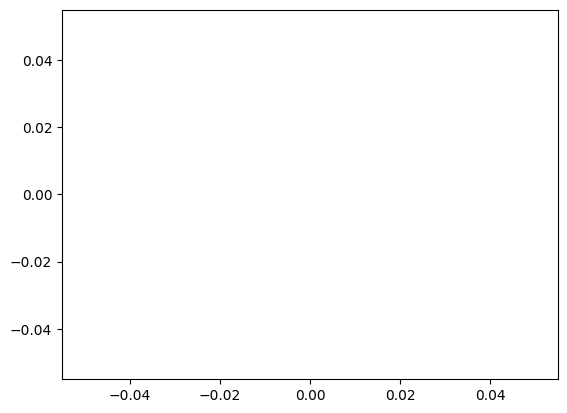

In [41]:
plt.plot([al[0].detach().cpu().numpy() for al in all_losses])
plt.plot([al[0] for al in all_accs])
np.save(f"7cos{str(75)}_hidden{hidden_dims}_epoch{num_epochs}.npy", np.array([al[0].detach().cpu().numpy() for al in all_losses]))

<ipython-input-160-3c7d09e80281>:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels([0]+[files[i].split("/")[-1][:-9] for i in [3, 4, 2, 0, 1]], rotation=30)


(0.4, 0.6)

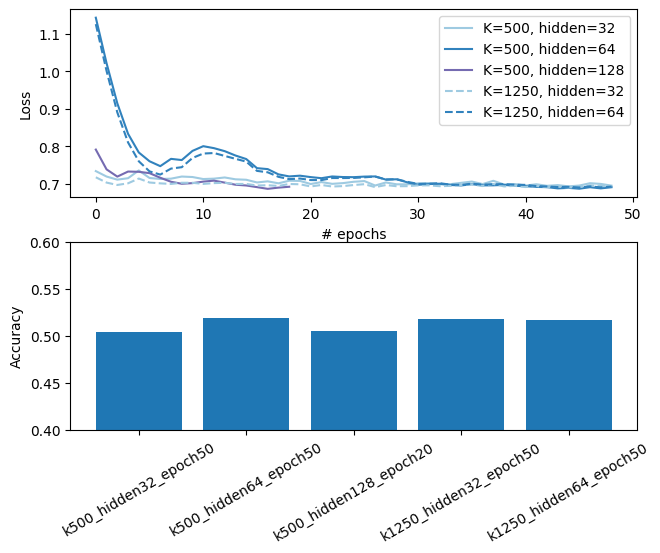

In [160]:
# plot some values
import glob
files = glob.glob("/content/cos*.npy")
files = sorted(files)
fig, (ax1, ax2) = plt.subplots(2)
accs = []
fig.tight_layout()
colors = plt.colormaps['tab20c'].colors
for i in [3, 4, 2, 0, 1]:
  split_info = files[i].split("/")[2].split("_")
  label = f"K={split_info[0][1:]}, hidden={split_info[1][6:]}"
  accs.append(int(split_info[-1][:-4])/10000)
  dat = np.load(files[i])
  if "1250" in split_info[0]:
    ls = "dashed"
  else:
    ls = "solid"

  if "32" in split_info[1]:
    c = colors[2]
  elif "64" in split_info[1]:
    c = colors[0]
  else:
    c = colors[12]
  ax1.plot(dat, linestyle=ls, color=c, label=label)
ax1.legend()
ax1.set_xlabel("# epochs")
ax1.set_ylabel("Loss")

ax2.bar(range(len(accs)), accs)
ax2.set_ylabel("Accuracy")
ax2.set_xticklabels([0]+[files[i].split("/")[-1][:-9] for i in [3, 4, 2, 0, 1]], rotation=30)
# ax.set_xticks(range(len(accs)+1), [0] + [files[i].split("/")[-1][:-9] for i in [3, 4, 2, 0, 1]])
ax2.set_ylim([0.4, 0.6])

In [ ]:
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, hidden_channels, output_channels):
        super().__init__()
        torch.manual_seed(1234567)
        self.conv1 = GATConv(data.num_features, hidden_channels)
        self.conv2 = GATConv(hidden_channels, hidden_channels)
        self.conv3 = GATConv(hidden_channels, output_channels)
        self.prelu = PReLU()

    def forward(self, x, edge_index):
        x = self.conv1(x, edge_index)
        x = self.prelu(x)
        x = self.conv2(x, edge_index)
        x = self.prelu(x)
        x = self.conv3(x, edge_index)
        return x

model = GAT(hidden_channels=8, output_channels=2)
print(model)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005, weight_decay=5e-4)
criterion = torch.nn.CrossEntropyLoss()

def train():
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      out = model(data.x, data.edge_index)  # Perform a single forward pass.
      loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.
      optimizer.step()  # Update parameters based on gradients.
      return loss

def test(mask):
      model.eval()
      out = model(data.x, data.edge_index)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct = pred[mask] == data.y[mask]  # Check against ground-truth labels.
      acc = int(correct.sum()) / int(mask.sum())  # Derive ratio of correct predictions.
      return acc


for epoch in range(1, 50):
    loss = train()
    val_acc = test(data.val_mask)
    test_acc = test(data.test_mask)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}, Test: {test_acc:.4f}')

GAT(
  (conv1): GATConv(21, 8, heads=1)
  (conv2): GATConv(8, 8, heads=1)
  (conv3): GATConv(8, 2, heads=1)
  (prelu): PReLU(num_parameters=1)
)


AttributeError: 'GlobalStorage' object has no attribute 'train_mask'

## Trying more structured approach

In [42]:
# represents data as an object assigned inputs as a grid and labels
graph_size = 4
edge_indices = []
batch_size = 24
for batch_index in range(0, batch_size):
  for i in range(graph_size):
    for j in range(graph_size):
      edge_indices.append([i+(batch_index*graph_size), j+(batch_index*graph_size)])

edge_indices = torch.tensor(edge_indices)

In [55]:
from torch_geometric.data import Data
from torch_geometric.nn import GATv2Conv, GraphNorm, ARMAConv
from torch.nn import Linear, PReLU
from torch_geometric.nn import global_mean_pool, TopKPooling, global_max_pool, global_add_pool
from torch_geometric.nn.aggr import SortAggregation
import torch.nn.functional as F

In [49]:


class GNN_v8(torch.nn.Module):
    # Jet index encoding?
    # An End-to-End Deep Learning Architecture for Graph Classification
    def __init__(self):
        super(GNN_v8, self).__init__()
        out_hidden = 512
        self.gat_conv1 = GATv2Conv(3, 64)
        self.gat_conv1_norm = GraphNorm(64)
        self.gat_conv2 = GATv2Conv(64, 128)
        self.gat_conv2_norm = GraphNorm(128)
        self.gat_conv3 = GATv2Conv(128, out_hidden)
        self.gat_conv3_norm = GraphNorm(out_hidden)

        self.gcn_conv1 = ARMAConv(3, 64)
        self.gcn_conv1_norm = GraphNorm(64)
        self.gcn_conv2 = ARMAConv(64, 128)
        self.gcn_conv2_norm = GraphNorm(128)
        self.gcn_conv3 = ARMAConv(128, out_hidden)
        self.gcn_conv3_norm = GraphNorm(out_hidden)
        self.aggr = SortAggregation(4)
        self.lin1 = Linear(out_hidden * 3 * 2, out_hidden)
        self.lin2 = Linear(out_hidden * 4 * 2, out_hidden)

        self.lin3 = Linear(out_hidden * 2 + 128, 1, bias=False)
        self.lin4 = Linear(2, 128) # additional_feat shape
        # self.lin4 = Linear(2, 2, bias=False)

    def forward(self, x, edge_index, batch, additional_feat=None):
        # x, edge_index, batch = data.x, data.edge_index, data.batch
        batch_size = batch.max() + 1
        gat_conv1 = self.gat_conv1(x, edge_index)
        gat_conv1 = F.elu(gat_conv1)
        gat_conv1 = self.gat_conv1_norm(gat_conv1, batch)

        gat_conv2 = self.gat_conv2(gat_conv1, edge_index)
        gat_conv2 = F.elu(gat_conv2)
        gat_conv2 = self.gat_conv2_norm(gat_conv2, batch)

        gat_conv3 = self.gat_conv3(gat_conv2, edge_index)
        gat_conv3 = F.elu(gat_conv3)
        gat_conv3 = self.gat_conv3_norm(gat_conv3, batch)

        gcn_conv1 = self.gcn_conv1(x, edge_index)
        gcn_conv1 = F.elu(gcn_conv1)
        gcn_conv1 = self.gcn_conv1_norm(gcn_conv1, batch)

        gcn_conv2 = self.gcn_conv2(gcn_conv1, edge_index)
        gcn_conv2 = F.elu(gcn_conv2)
        gcn_conv2 = self.gcn_conv2_norm(gcn_conv2, batch)

        gcn_conv3 = self.gcn_conv3(gcn_conv2, edge_index)
        gcn_conv3 = F.elu(gcn_conv3)
        gcn_conv3 = self.gcn_conv3_norm(gcn_conv3, batch)

        gcn_gat = torch.cat([gat_conv3, gcn_conv3], dim=1)

        x_max = global_max_pool(gcn_gat, batch)
        x_mean = global_mean_pool(gcn_gat, batch)
        x_add = global_add_pool(gcn_gat, batch)
        x_norm_pool = torch.cat([x_max, x_mean, x_add], dim=1)
        x_norm_pool = self.lin1(x_norm_pool)

        x_agg_pool = self.aggr(gcn_gat, batch)
        x_agg_pool = self.lin2(x_agg_pool)

        if additional_feat is not None:
            additional_feat = additional_feat.reshape(batch_size, 2)
            additional_feat = self.lin4(additional_feat)
            x = torch.cat([x_norm_pool, x_agg_pool, additional_feat], dim=1)
        else:
            x = torch.cat([x_norm_pool, x_agg_pool], dim=1)
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.lin3(x)
        # x = self.lin4(x)
        return x

In [45]:
positive_edge_name_dict = {
    0: "H0", # heavy higgs
    1: "W1", # l/v decay W boson
    2: "H+-", # Intermediate higgs
    3: "h0", # light higgs
    4: "W2", # regular jet W boson
    5: "jet_b_1", # first bottom jet
    6: "jet_b_2", # second bottom jet
    7: "lepton", # lepton
    # 8: "missing", # part i'm not sure about. Pretty sure this will connect to W1
    8: "jet_1", # non-bottom jet
    9: "jet_2" # non-bottom jet
}

negative_edge_name_dict = {
    0: "collision", # not-higgs source
    1: "W1", # l/v decay W boson
    2: "t1", # top quark that connects to lv
    3: "t2", # top quark that connects to jets
    4: "W2", # regular jet W boson
    5: "jet_b_1", # first bottom jet
    6: "jet_b_2", # second bottom jet
    7: "lepton", # lepton
    # 8: "missing", # part i'm not sure about. Pretty sure this will connect to W1
    8: "jet_1", # non-bottom jet
    9: "jet_2" # non-bottom jet
}

# directed graph: information passes inwards. Could also just make undirected (flip all in array)
# [from, to]
positive_edge_indices = torch.tensor([
    [5, 3],
    [6, 3],
    [8, 4],
    [9, 4],
    [7, 1],
    # [8, 1],
    [3, 2],
    [4, 2],
    [2, 0],
    [1, 0]
])

negative_edge_indices = torch.tensor([
    [7, 1],
    # [8, 1],
    [8, 4],
    [9, 4],
    [4, 3],
    [1, 2],
    [6, 3],
    [5, 2],
    [2, 0],
    [3, 0]
])

In [95]:
import torch_geometric
from sklearn.preprocessing import MinMaxScaler

class HiggsDatasetNewPyG(torch_geometric.data.Dataset):
    def __init__(self, csv_file, split, norm=False, drop_feats=False, root=None, transform=None,
                 pre_transform=None,
                 pre_filter=None):
        super().__init__(root, transform, pre_transform, pre_filter)
        # Load data
        self.split = split
        self.higgs_frame = pd.read_csv(csv_file, compression='gzip', header=None, nrows=20000)
        # enable shuffle
        if split == "train":
          self.higgs_frame = self.higgs_frame.sample(frac=1).reset_index(drop=True)
        self.higgs_frame.columns = [
            'class_label',
            'lepton_pT', 'lepton_eta', 'lepton_phi',
            'missing_energy_magnitude', 'missing_energy_phi',
            'jet_1_pt', 'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag',
            'jet_2_pt', 'jet_2_eta', 'jet_2_phi', 'jet_2_b-tag',
            'jet_3_pt', 'jet_3_eta', 'jet_3_phi', 'jet_3_b-tag',
            'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag',
            'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']
        if drop_feats:
            self.higgs_frame = self.higgs_frame.drop(
                columns=['m_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'])
        if norm:
            self.higgs_frame = self.normalize(self.higgs_frame)
        total_rows = len(self.higgs_frame)

        if self.split == 'train':
            self.higgs_frame = self.higgs_frame[:int(total_rows * 0.6)]
        elif self.split == 'val':
            self.higgs_frame = self.higgs_frame[int(total_rows * 0.6):int(total_rows * 0.8)]
        elif self.split == 'test':
            higgs_frame_reversed = self.higgs_frame[int(total_rows * 0.8):]
            # higgs_frame_reversed.loc[:, "class_label"] = [int(lab != 1) for lab in higgs_frame_reversed["class_label"]]
            self.higgs_frame = higgs_frame_reversed
            # self.higgs_frame = pd.concat([self.higgs_frame[int(total_rows * 0.8):], higgs_frame_reversed]).sort_index().reset_index(drop=True)

    def len(self):
        return len(self.higgs_frame)

    def get(self, idx):
        data = self.higgs_frame.iloc[idx, 1:].values
        data_len = len(data)
        data = data.astype('float')
        class_label = self.higgs_frame.iloc[idx, 0]

        lepton_raw = data[0:3]
        missing_energy_raw = data[3:5]
        jet1_raw = data[5:9]
        jet2_raw = data[9:13]
        jet3_raw = data[13:17]
        jet4_raw = data[17:21]
        high_level_raw = data[21:28]

        # sort jet1-4 by last elemnt of each jet_raw
        jet_total = torch.tensor([jet1_raw, jet2_raw, jet3_raw, jet4_raw])
        jet_total = jet_total[jet_total[ :, 3].argsort()]

        w_jet_1 = jet_total[0, :3]
        w_jet_2 = jet_total[1, :3]
        b_jet_1 = jet_total[2, :3]
        b_jet_2 = jet_total[3, :3]

        lepton_raw = torch.tensor(lepton_raw, dtype=torch.float)
        missing_energy_raw = torch.tensor(missing_energy_raw, dtype=torch.float)
        high_level_raw = torch.tensor(high_level_raw, dtype=torch.float)

        # node
        # node_names = ['empty1', 'empty2', 'empty3', 'b_jet_1', 'b_jet_2', 'w_jet_1', 'w_jet_2', 'lepton']
        # data = torch.stack([empty_node_1, empty_node_2, empty_node_3, b_jet_1, b_jet_2, w_jet_1, w_jet_2, lepton_raw])
        if self.split == "test":
          class_label = int(class_label == 0)
        if class_label == 0:
          node_names = positive_edge_name_dict.keys()
          empty_node_0 = torch.full(torch.Size([3]), high_level_raw[6])
          empty_node_1 = torch.full(torch.Size([3]), high_level_raw[2])
          empty_node_2 = torch.full(torch.Size([3]), high_level_raw[5])
          empty_node_3 = torch.full(torch.Size([3]), high_level_raw[4])
          empty_node_4 = torch.full(torch.Size([3]), high_level_raw[0])
          self.edge_index = torch.tensor(positive_edge_indices).t().contiguous()
        elif class_label == 1:
          node_names = negative_edge_name_dict.keys()
          empty_node_0 = torch.full(torch.Size([3]), high_level_raw[6])
          empty_node_1 = torch.full(torch.Size([3]), high_level_raw[2])
          empty_node_2 = torch.full(torch.Size([3]), high_level_raw[3])
          empty_node_3 = torch.full(torch.Size([3]), high_level_raw[1])
          empty_node_4 = torch.full(torch.Size([3]), high_level_raw[0])
          self.edge_index = torch.tensor(negative_edge_indices).t().contiguous()
        else:
          raise Exception("Not implemented")

        data = torch.stack([empty_node_0, empty_node_1, empty_node_2, empty_node_3, empty_node_4, b_jet_1, b_jet_2, lepton_raw, w_jet_1, w_jet_2])
        sample = Data(x=torch.tensor(data, dtype=torch.float), edge_index=self.edge_index,
                      y=torch.tensor(int(class_label), dtype=torch.float),
                      node_name=node_names,
                      batch=torch.repeat_interleave(torch.tensor(range(batch_size)), 10))
        sample.additional_feat = torch.concat([missing_energy_raw], dim=0)
        return sample

    def normalize(self, df):
        columns_to_normalize_0_1 = ['jet_1_b-tag', 'jet_2_b-tag', 'jet_3_b-tag', 'jet_4_b-tag',
                                    'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb']

        columns_to_normalize_minus1_1 = [col for col in df.columns if
                                         col not in columns_to_normalize_0_1 + ['class_label']]
        data_0_1 = df[columns_to_normalize_0_1]
        data_minus1_1 = df[columns_to_normalize_minus1_1]
        scaler_0_1 = MinMaxScaler(feature_range=(0, 1))
        data_0_1 = pd.DataFrame(scaler_0_1.fit_transform(data_0_1), columns=data_0_1.columns)
        scaler_minus1_1 = MinMaxScaler(feature_range=(-1, 1))
        data_minus1_1 = pd.DataFrame(scaler_minus1_1.fit_transform(data_minus1_1), columns=data_minus1_1.columns)

        normalized_df = pd.concat([df['class_label'], data_0_1, data_minus1_1], axis=1)
        normalized_df = normalized_df.reindex(columns=df.columns)

        return normalized_df

In [96]:
from tqdm import tqdm

# model = GNN_v8().to("cuda")

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.97)
criterion = torch.nn.BCEWithLogitsLoss()
# edge_indices = torch.tensor([[1, 2, 3, 4, 5, 6, 7], [0, 0, 1, 2, 1, 2, 6]])

train_dataset = HiggsDatasetNewPyG(csv_file='/content/HIGGS.csv.gz', split='train', norm=False)
val_dataset = HiggsDatasetNewPyG(csv_file='/content/HIGGS.csv.gz', split='val', norm=False)
test_dataset = HiggsDatasetNewPyG(csv_file='/content/HIGGS.csv.gz', split='test', norm=False)

batch_size = 4
train_loader = torch_geometric.loader.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
val_loader = torch_geometric.loader.DataLoader(val_dataset, batch_size=batch_size, shuffle=False, pin_memory=True)
test_loader = torch_geometric.loader.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [94]:
ys = []
for data in tqdm(test_loader):
  ys.append(data.y)

  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-92-805ebcf5723b>:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_index = torch.tensor(positive_edge_indices).t().contiguous()
<ipython-input-92-805ebcf5723b>:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample = Data(x=torch.tensor(data, dtype=torch.float), edge_index=self.edge_index,
<ipython-input-92-805ebcf5723b>:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_index = torch.tensor(negative_edge_indices).t().contiguous()
100%|██████████| 1000/1000 [00:04

In [71]:
num_epochs = 35
device = "cuda"
for epoch in range(num_epochs):
  train_loss = 0
  model.train()
  for data in tqdm(train_loader, desc=f"Epoch {epoch}"):
    optimizer.zero_grad()
    data = data.cuda()

    out = model(data.x, data.edge_index, data.batch, data.additional_feat)
    loss = criterion(out, data.y.float().unsqueeze(1))
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
  lr_scheduler.step()

  val_loss = 0
  for data in tqdm(val_loader, desc=f"Epoch {epoch}"):
      data = data.to(device)
      out = model(data.x, data.edge_index, data.batch, data.additional_feat)
      loss = criterion(out, data.y.float().unsqueeze(1))
      val_loss += loss.item()

  print(f'Epoch {epoch}, Train loss: {train_loss / len(train_loader)}, Val loss: {val_loss / len(val_loader)}, '
              f'learning rate: {optimizer.param_groups[0]["lr"]}')

Epoch 0:   0%|          | 0/3000 [00:00<?, ?it/s]<ipython-input-67-c06b6fcb8368>:81: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_index = torch.tensor(positive_edge_indices).t().contiguous()
<ipython-input-67-c06b6fcb8368>:94: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample = Data(x=torch.tensor(data, dtype=torch.float), edge_index=self.edge_index,
<ipython-input-67-c06b6fcb8368>:89: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_index = torch.tensor(negative_edge_indices).t().contiguous()
Epoch 0: 100%|██████████

Epoch 0, Train loss: 0.1483844516391633, Val loss: 0.009957233563286422, learning rate: 0.0009699999999999999


Epoch 1: 100%|██████████| 1000/1000 [00:16<00:00, 61.46it/s]


Epoch 1, Train loss: 0.07711176019149166, Val loss: 0.0, learning rate: 0.0009408999999999999


Epoch 2:  27%|██▋       | 270/1000 [00:04<00:12, 56.93it/s]


KeyboardInterrupt: 

In [100]:
# evaluate accuracy:
outputs = []
labels = []
idx =0
correct, seen = 0, 0
for data in tqdm(test_loader):
    data = data.to(device)
    out = F.sigmoid(model(data.x, data.edge_index, data.batch, data.additional_feat))
    outputs.append(out)
    y = ys[idx]
    labels.append(y)
    idx += 1
    for y_true, batch in zip(y, out):
      if (batch[0] >= 0.5 and y_true) or (batch[0] < 0.5 and not y_true):
        correct += 1
      seen += 1


  0%|          | 0/1000 [00:00<?, ?it/s]<ipython-input-95-51c2d7e01ef5>:91: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_index = torch.tensor(negative_edge_indices).t().contiguous()
<ipython-input-95-51c2d7e01ef5>:96: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  sample = Data(x=torch.tensor(data, dtype=torch.float), edge_index=self.edge_index,
<ipython-input-95-51c2d7e01ef5>:83: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.edge_index = torch.tensor(positive_edge_indices).t().contiguous()
100%|██████████| 1000/1000 [00:18

In [101]:
correct/seen

0.0

In [29]:
batch_size = 1
graph_size = 4

In [50]:
higgs_data.columns

Index(['class_label', 'lepton_pT', 'lepton_eta', 'lepton_phi',
       'missing_energy_magnitude', 'missing_energy_phi', 'jet_1_pt',
       'jet_1_eta', 'jet_1_phi', 'jet_1_b-tag', 'jet_2_pt', 'jet_2_eta',
       'jet_2_phi', 'jet_2_b-tag', 'jet_3_pt', 'jet_3_eta', 'jet_3_phi',
       'jet_3_b-tag', 'jet_4_pt', 'jet_4_eta', 'jet_4_phi', 'jet_4_b-tag',
       'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'],
      dtype='object')

In [44]:
# actual graph: fully connected to one another. Classify entire graph as yes/no higgs boson.
# actual graph: unidirectional connection to central node of unknown persuasion (embedding space); classify node
def split_dataframe(data, batch_size, i):
  # data = data.drop(["class_label", 'm_jj', 'm_jjj', 'm_lv', 'm_jlv', 'm_bb', 'm_wbb', 'm_wwbb'], axis=1)
  data = data.drop(["class_label"], axis=1)
  print(data.shape)
  print(i, i+batch_size)
  # return torch.tensor(data.iloc[i:i+batch_size].values).float()
  return [
      torch.tensor(data.iloc[i:i+batch_size, 0:3].values).float(),
      torch.tensor(data.iloc[i:i+batch_size, 3:5].values).float(),
      torch.tensor(data.iloc[i:i+batch_size, 5:21].values).float(),
      # torch.tensor(data.iloc[i:i+batch_size, 5:9].values).float(),
      # torch.tensor(data.iloc[i:i+batch_size, 9:13].values).float(),
      # torch.tensor(data.iloc[i:i+batch_size, 13:17].values).float(),
      # torch.tensor(data.iloc[i:i+batch_size, 17:21].values).float(),
      torch.tensor(data.iloc[i:i+batch_size, 21:].values).float()
    ]


random_edge_indices = []
for i in range(batch_size):
  for j in range(graph_size):
    random_edge_indices.append([i, j])
random_edge_indices = torch.tensor(random_edge_indices).t().contiguous()
print(random_edge_indices)

class StructuredGAT(torch.nn.Module):
    def __init__(self, embedding_channels, hidden_channels, output_channels, edge_indices, batch_size):
        super().__init__()
        out_hidden = 512

        self.edge_indices = edge_indices
        self.batch_size = batch_size
        self.batch = torch.repeat_interleave(torch.tensor(range(batch_size)), graph_size)
        # self.pooling = TopKPooling(36)

        self.mlps = [
            # Linear(28, embedding_channels)
            Linear(3, embedding_channels),
            Linear(2, embedding_channels),
            Linear(16, embedding_channels),
            # Linear(4, embedding_channels),
            # Linear(4, embedding_channels),
            # Linear(4, embedding_channels),
            # Linear(4, embedding_channels),
            Linear(7, embedding_channels)
        ]

        self.gat_conv1 = GATv2Conv(30, 64)
        self.gat_conv1_norm = GraphNorm(64)
        self.gat_conv2 = GATv2Conv(64, 128)
        self.gat_conv2_norm = GraphNorm(128)
        self.gat_conv3 = GATv2Conv(128, out_hidden)
        self.gat_conv3_norm = GraphNorm(out_hidden)

        self.gcn_conv1 = ARMAConv(3, 64)
        self.gcn_conv1_norm = GraphNorm(64)
        self.gcn_conv2 = ARMAConv(64, 128)
        self.gcn_conv2_norm = GraphNorm(128)
        self.gcn_conv3 = ARMAConv(128, out_hidden)
        self.gcn_conv3_norm = GraphNorm(out_hidden)
        self.aggr = SortAggregation(4)
        self.lin1 = Linear(out_hidden * 3, out_hidden)
        self.lin2 = Linear(out_hidden * 4, out_hidden)

        self.lin3 = Linear(out_hidden * 2, 1, bias=False)
        self.lin4 = Linear(1, 128) # additional_feat shape
        # self.lin4 = Linear(2, 2, bias=False)




    # def forward(self, x):
    #     # [lepton, missing, jet1, jet2, jet3, jet4] = x
    #     # mlp_outputs = []
    #     # for mlp, raw_data in zip(self.mlps, x):
    #     #   mlp_outputs.append(mlp(raw_data))
    #       # print(mlp_outputs[-1].mean())
    #       # print(mlp_outputs[-1])
    #     x_0 = self.lepton_mlp(x[0])
    #     x_1 = self.missing_mlp(x[1])
    #     x_2 = self.jet_mlp(x[2])
    #     x_3 = self.computed_mlp(x[3])
    #     x = torch.stack([x_0, x_1, x_2, x_3], dim=1)
    #     x = torch.flatten(x, start_dim=0, end_dim=1)
    #     # print(mlp_outputs)
    #     # [num_samples, embedding_channels]
    #     # print(mlp_outputs.shape, mlp_outputs, self.edge_indices)
    #     x = self.att0(x, self.edge_indices)
    #     x = x.relu()
    #     # x = self.att1(x, self.edge_indices)
    #     x = self.pooling(x, self.edge_indices, batch=self.batch)
    #     print(len(x))
    #     print(x)
    #     # print(x.shape)
    #     # x = x.relu()
    #     x = self.lin(x)
    #     # print(x.shape)
    #     return x

    def forward(self, x, edge_index, batch, additional_feat=None):
        # x, edge_index, batch = data.x, data.edge_index, data.batch
        batch_size = batch.max() + 1
        x_0 = self.mlps[0](x[0])
        x_1 = self.mlps[1](x[1])
        x_2 = self.mlps[2](x[2])
        x_3 = self.mlps[3](x[3])
        x = torch.stack([x_0, x_1, x_2, x_3], dim=1)
        x = torch.flatten(x, start_dim=0, end_dim=1)

        print(x.shape)
        gat_conv1 = self.gat_conv1(x, edge_index)
        gat_conv1 = F.elu(gat_conv1)
        gat_conv1 = self.gat_conv1_norm(gat_conv1, batch)

        gat_conv2 = self.gat_conv2(gat_conv1, edge_index)
        gat_conv2 = F.elu(gat_conv2)
        gat_conv2 = self.gat_conv2_norm(gat_conv2, batch)

        gat_conv3 = self.gat_conv3(gat_conv2, edge_index)
        gat_conv3 = F.elu(gat_conv3)
        gat_conv3 = self.gat_conv3_norm(gat_conv3, batch)

        # gcn_conv1 = self.gcn_conv1(x, edge_index)
        # gcn_conv1 = F.elu(gcn_conv1)
        # gcn_conv1 = self.gcn_conv1_norm(gcn_conv1, batch)

        # gcn_conv2 = self.gcn_conv2(gcn_conv1, edge_index)
        # gcn_conv2 = F.elu(gcn_conv2)
        # gcn_conv2 = self.gcn_conv2_norm(gcn_conv2, batch)

        # gcn_conv3 = self.gcn_conv3(gcn_conv2, edge_index)
        # gcn_conv3 = F.elu(gcn_conv3)
        # gcn_conv3 = self.gcn_conv3_norm(gcn_conv3, batch)

        # gcn_gat = torch.cat([gat_conv3, gcn_conv3], dim=1)

        x_max = global_max_pool(gat_conv3, batch)
        x_mean = global_mean_pool(gat_conv3, batch)
        x_add = global_add_pool(gat_conv3, batch)
        x_norm_pool = torch.cat([x_max, x_mean, x_add], dim=1)
        x_norm_pool = self.lin1(x_norm_pool)
        x_agg_pool = self.aggr(gat_conv3, batch)
        x_agg_pool = self.lin2(x_agg_pool)

        if additional_feat is not None:
            additional_feat = additional_feat.reshape(batch_size, 2)
            additional_feat = self.lin4(additional_feat)
            x = torch.cat([x_norm_pool, x_agg_pool, additional_feat], dim=1)
        else:
            x = torch.cat([x_norm_pool, x_agg_pool], dim=1)
        x = F.dropout(x, p=0.2, training=self.training)
        x = self.lin3(x)
        # x = self.lin4(x)
        return x

model = StructuredGAT(embedding_channels=30, hidden_channels=36, output_channels=1, edge_indices=random_edge_indices, batch_size=batch_size)
# model = GNN_v8()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.97)
criterion = torch.nn.BCEWithLogitsLoss()

def train(start_index):
      model.train()
      optimizer.zero_grad()  # Clear gradients.
      # print(start_index)
      x = split_dataframe(higgs_data, batch_size, start_index)
      batch_idx = torch.tensor(list(range(graph_size))).repeat_interleave(batch_size)
      # x = torch.from_numpy(np.array([torch.tensor(v).t() for v in higgs_data.drop(["class_label"], axis=1).iloc[start_index:start_index+batch_size].values])).float()
      # x = torch.tensor(higgs_data.drop(["class_label"], axis=1).iloc[start_index:start_index+batch_size].values).float()
      y = torch.tensor(higgs_data.iloc[start_index:start_index+batch_size].loc[:,"class_label"].values)
      out = model(x, random_edge_indices, batch_idx)  # Perform a single forward pass.
      loss = criterion(out, y[:, None])  # Compute the loss solely based on the training nodes.
      loss.backward()  # Derive gradients.

      optimizer.step()  # Update parameters based on gradients.
      return loss

def test(start_index):
      model.eval()
      x = split_dataframe(higgs_data, batch_size, start_index)
      # x = torch.tensor(higgs_data.drop(["class_label"], axis=1).iloc[start_index:start_index+batch_size].values)
      y = torch.from_numpy(higgs_data.iloc[start_index:start_index+batch_size].loc[:,"class_label"].values).long()
      out = model(x)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      # print(pred, y)
      correct = pred == y  # Check against ground-truth labels.
      acc = int(correct.sum()) / int(len(y))  # Derive ratio of correct predictions.
      return acc

num_epochs = 10
for epoch in range(0, num_epochs):
    loss = train(epoch*batch_size)
    val_acc = test((10000-num_epochs*batch_size)+epoch*batch_size)
    print(f'Epoch: {epoch:03d}, Loss: {loss:.4f}, Val: {val_acc:.4f}')

tensor([[0, 0, 0, 0],
        [0, 1, 2, 3]])
(10000, 28)
0 1
torch.Size([4, 30])


ValueError: Target size (torch.Size([1, 1])) must be the same as input size (torch.Size([4, 1]))

In [41]:
batch_idx = torch.tensor(list(range(graph_size))).repeat_interleave(batch_size)
batch_idx

tensor([0, 1, 2, 3])

## Reproduce 500-layer model

In [ ]:
class PaperModel(torch.nn.Module):
  def __init__(self, **kwargs):
    continue

  def forward(self):
    continue
